In [40]:
import neurolab as nl
import numpy as np
import numpy.matlib
from neupy import algorithms
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score
import random

In [41]:
def p1(k):
    return np.sin(4 * np.pi * k)


def gf(k):
    return np.cos(k**2 - 9*k + 3)


k1 = [0, 1]
k2 = [2.84, 6.25]
h = 0.025
R = np.array([3, 4, 6])

In [42]:
def gen_train_signal(R):
    p = p1(np.arange(k1[0], k1[-1], h))
    t1 = np.full_like(p, -1)
    g = gf(np.arange(k2[0], k2[-1], h))
    t2 = np.full_like(g, 1)
    g = g.reshape(1, g.size)
    t2 = t2.reshape(1, t2.size)

    P = np.concatenate((numpy.matlib.repmat(p, 1, R[0]), g,
                        numpy.matlib.repmat(p, 1, R[1]), g,
                        numpy.matlib.repmat(p, 1, R[2]), g), axis=1).reshape(-1, 1)

    T = np.concatenate((numpy.matlib.repmat(t1, 1, R[0]), t2,
                        numpy.matlib.repmat(t1, 1, R[1]), t2,
                        numpy.matlib.repmat(t1, 1, R[2]), t2), axis=1).reshape(-1, 1)
    return P, T

In [43]:
def plot_train_signal(p, t):
    plt.figure(figsize=(15, 5))
    plt.plot(p.reshape(p.shape[0]))
    plt.plot(t.reshape(t.shape[0]))
    plt.legend(['Train input', 'Train target'])
    plt.title("Train signal")
    plt.grid(True)
    plt.show()

In [44]:
def train_elman_net(p, t):
    elman = nl.net.newelm([[-1, 1]], [10, 1], [nl.trans.TanSig(),  nl.trans.TanSig()])
    elman.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
    elman.layers[1].initf= nl.init.InitRand([-0.1, 0.1], 'wb')
    elman.init()
    error = elman.train(p, t, epochs=150, show=10, goal=0.00001)
    return elman.sim(p), error

In [45]:
def plot_result(p, t, result, error):
    fig, ax = plt.subplots()
    fig.set_figwidth(15)
    fig.set_figheight(5)
    ax.grid(True)
    ax.plot(error)
    ax.set_xlabel('Epoch number')
    ax.set_ylabel('Train error (MSE)')
    ax.set_title("MSE")

    fig, ax = plt.subplots()
    fig.set_figwidth(15)
    fig.set_figheight(5)
    ax.grid(True)
    ax.plot(t.reshape(t.shape[0]))
    ax.plot(result.reshape(result.shape[0]))
    ax.legend(['Train target', 'Network output'])
    ax.set_title("Network Result")

    mse = mean_squared_error(t, result)
    # accuracy = accuracy_score(t, result)
    print(f'MSE = {mse}')
    print(f'RMSE = {np.sqrt(mse)}')
    # print(f'ACCURACY = {accuracy}')

In [46]:
NUMBERS = {
    0: np.matrix([
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
            0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
            0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
            0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
            0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
            0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
            0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
            0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
            0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
            0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0
        ]),
    1: np.matrix([
            0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
            0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
            0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
            0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
            0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
            0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
            0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
            0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
            0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
            0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
            0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
            0, 0, 0, 1, 1, 1, 1, 0, 0, 0
        ]),
    6: np.matrix([
            1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
            1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
            1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
            1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
            1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
            1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
            1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
            1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
            1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
            1, 1, 1, 1, 1, 1, 0, 0, 0, 0
        ])
}

In [47]:
def plot_number(number):
    for row in number.reshape(12, 10).tolist():
        print(' '.join(' #'[val] for val in row))

In [48]:
def put_noise(number, percent):
    limit = number.shape[1]
    tmp = number.T
    
    for i in range(percent):
        pos = np.random.randint(1, limit, 1)[0]
        tmp[pos] *= 0
    res = tmp.T
    return res

## Использовать сеть Элмана для распознавания динамических образов

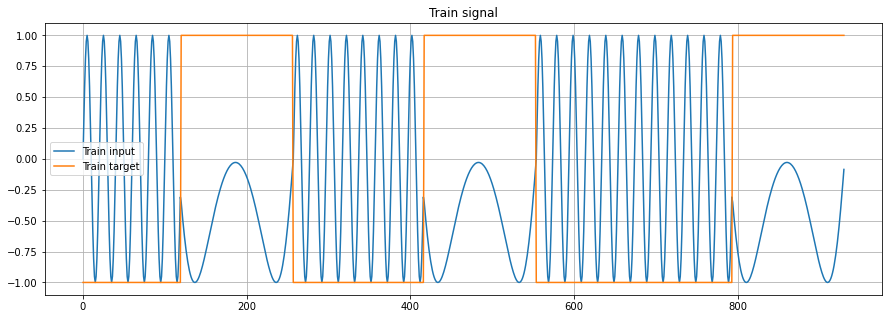

In [49]:
p, t = gen_train_signal([3, 4, 6])
plot_train_signal(p, t)

In [51]:
result, error = train_elman_net(p, t)

Epoch: 10; Error: 0.8685144501087656;
Epoch: 20; Error: 0.6843797132080932;
Epoch: 30; Error: 0.10003009125963479;
Epoch: 40; Error: 1.023002901711216;
Epoch: 50; Error: 0.7204853654490493;
Epoch: 60; Error: 0.4915166523779955;
Epoch: 70; Error: 0.5180251871410508;
Epoch: 80; Error: 0.14036445271436077;
Epoch: 90; Error: 0.08384486580459301;
Epoch: 100; Error: 0.039074680256821134;
Epoch: 110; Error: 0.032111485000421006;
Epoch: 120; Error: 0.02217803512780071;
Epoch: 130; Error: 0.018836707722363434;
Epoch: 140; Error: 0.018111412003323637;
Epoch: 150; Error: 0.016304774950776087;
The maximum number of train epochs is reached


MSE = 0.016306637858263882
RMSE = 0.1276974465612523


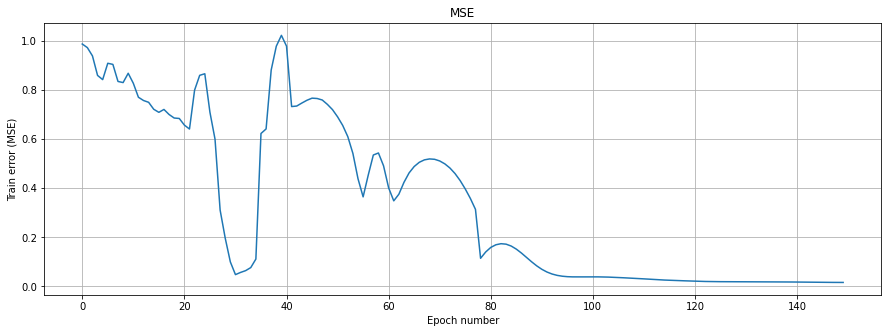

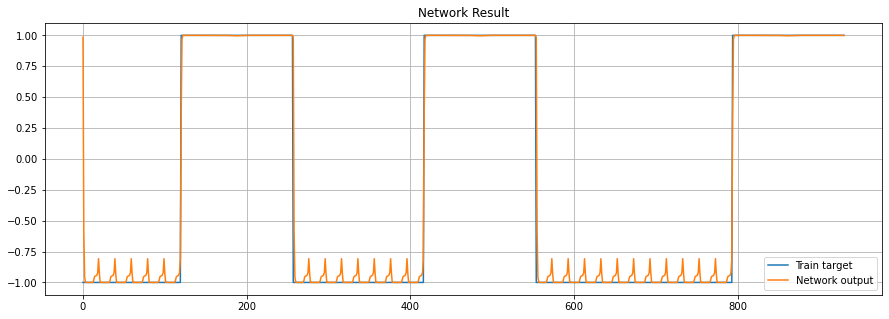

In [52]:
plot_result(p, t, result, error)

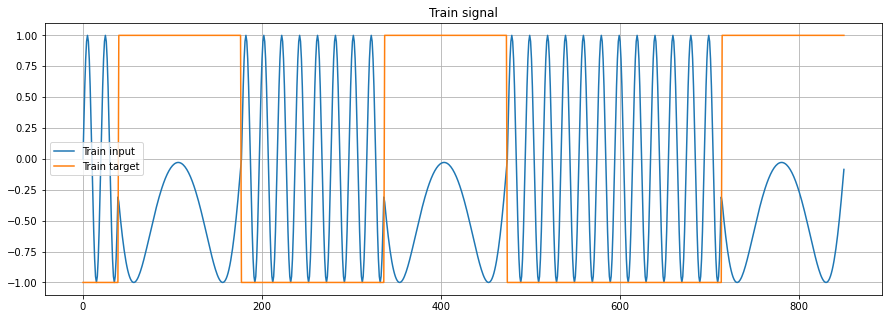

In [53]:
p, t = gen_train_signal([1, 4, 6])
plot_train_signal(p, t)

In [56]:
result, error = train_elman_net(p, t)

Epoch: 10; Error: 0.8585271213020547;
Epoch: 20; Error: 0.8378132026760929;
Epoch: 30; Error: 0.7094947389617914;
Epoch: 40; Error: 0.5331993913229047;
Epoch: 50; Error: 0.7015161244598049;
Epoch: 60; Error: 0.04460532079610133;
Epoch: 70; Error: 0.11753325346146534;
Epoch: 80; Error: 0.10701311765995333;
Epoch: 90; Error: 0.1475274238127273;
Epoch: 100; Error: 0.1530108452686428;
Epoch: 110; Error: 0.14364674633243507;
Epoch: 120; Error: 0.1301622606345474;
Epoch: 130; Error: 0.11887171941916798;
Epoch: 140; Error: 0.11726773269271393;
Epoch: 150; Error: 0.11429564648116101;
The maximum number of train epochs is reached


MSE = 0.11429493404264376
RMSE = 0.3380753378207937


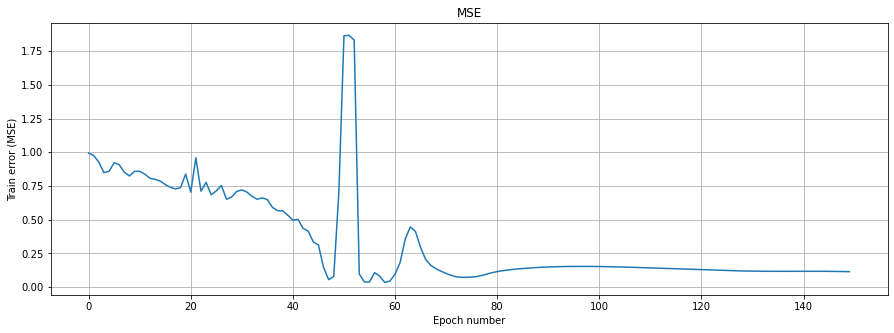

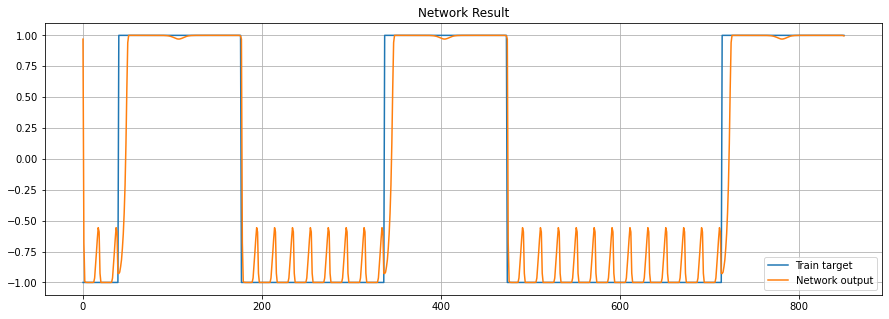

In [57]:
plot_result(p, t, result, error)

## Использовать сеть Хопфилда для распознавания статических образов

In [58]:
plot_number(NUMBERS[0])
print()
plot_number(NUMBERS[1])
print()
plot_number(NUMBERS[6])

                   
      # # # #      
    # # # # # #    
  # # #     # # #  
  # # #     # # #  
  # # #     # # #  
  # # #     # # #  
  # # #     # # #  
  # # #     # # #  
    # # # # # #    
      # # # #      
                   

      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      

# # # # # #        
# # # # # #        
#                  
#                  
# # # # # #        
# # # # # #        
# #     # #        
# #     # #        
# #     # #        
# #     # #        
# # # # # #        
# # # # # #        


In [59]:
train_data = np.concatenate(list(NUMBERS.values()), axis=0)

In [60]:
hopfield = algorithms.DiscreteHopfieldNetwork(mode='async', n_times=600)
hopfield.train(train_data)

Эталонное число

In [61]:
plot_number(NUMBERS[1])

      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      


Число из сети Хопфилда

In [62]:
plot_number(hopfield.predict(NUMBERS[1]))

      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      


In [63]:
six_noise_20 = put_noise(NUMBERS[6], 20)
plot_number(six_noise_20)

# # # # # #        
# # # # # #        
                   
                   
# # # # #          
  # # # # #        
  #     #          
# #     # #        
# #     # #        
# #                
# # # # # #        
  # # #   #        


In [64]:
plot_number(hopfield.predict(six_noise_20))

# # # # # #        
# # # # # #        
#                  
#                  
# # # # # #        
# # # # # #        
# #     # #        
# #     # #        
# #     # #        
# #     # #        
# # # # # #        
# # # # # #        


In [65]:
one_noise_30 = put_noise(NUMBERS[1], 30)
plot_number(one_noise_30)

        # #        
        # # #      
        # # #      
        # # #      
      # # # #      
      # #   #      
      # # # #      
      # #   #      
      #   # #      
      # # #        
        # # #      
      # # # #      


In [66]:
plot_number(hopfield.predict(one_noise_30))

      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      
      # # # #      


## Использовать сеть Хэмминга для распознавания статических образов

In [67]:
NUMBERS = {
    0: np.array([
            -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
            -1, -1, -1,  1,  1,  1,  1, -1, -1, -1,
            -1, -1,  1,  1,  1,  1,  1,  1, -1, -1,
            -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,
            -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,
            -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,
            -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,
            -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,
            -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,
            -1, -1,  1,  1,  1,  1,  1,  1, -1, -1,
            -1, -1, -1,  1,  1,  1,  1, -1, -1, -1,
            -1, -1, -1, -1, -1, -1, -1, -1, -1, -1
        ]),
    1: np.array([
            -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
            -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
            -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
            -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
            -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
            -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
            -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
            -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
            -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
            -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
            -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
            -1, -1, -1, 1, 1, 1, 1, -1, -1, -1
        ]),
    6: np.array([
            1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
            1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
            1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
            1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
            1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
            1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
            1,  1, -1, -1,  1,  1, -1, -1, -1, -1,
            1,  1, -1, -1,  1,  1, -1, -1, -1, -1,
            1,  1, -1, -1,  1,  1, -1, -1, -1, -1,
            1,  1, -1, -1,  1,  1, -1, -1, -1, -1,
            1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
            1,  1,  1,  1,  1,  1, -1, -1, -1, -1
        ])
}

In [68]:
Q = 3
patterns = np.array(list(NUMBERS.values()))
nums = [0, 1, 6]
eps = 1 / (Q - 1)
shape = 10 * 12
IW = np.array([NUMBERS[0].T, NUMBERS[1].T, NUMBERS[6].T])
b = shape * np.ones((Q, 1))
a = np.zeros((Q, Q))
for i in range(Q):
    a[i] = IW[i] @ patterns[i] + b[i]   
LW = np.eye(Q)
LW[LW == 0.0] = -eps
hop = nl.net.newhop(a, max_init=600)
hop.layers[0].np['w'][:] = LW
hop.layers[0].np['b'][:] = 0

In [69]:
def make_noise(num, percent):
    res = num.copy()
    for i in range(len(res)): 
        if random.random() > 1 - percent:
            res[i] *= -1
    return res

In [70]:
def predict(number):
    res = hop.sim(IW @ number + b)
    print('Result: ', res[0])
    answ = np.argmax(res[0])
    print(f'Predicted number = {nums[answ]}')

In [71]:
predict(NUMBERS[0])

Result:  [ 1. -1. -1.]
Predicted number = 0


In [72]:
predict(NUMBERS[1])

Result:  [-1.  1. -1.]
Predicted number = 1


In [73]:
predict(NUMBERS[6])

Result:  [-1. -1.  1.]
Predicted number = 6


In [74]:
predict(make_noise(NUMBERS[6], 0.2))

Result:  [-1. -1.  1.]
Predicted number = 6


In [75]:
predict(make_noise(NUMBERS[0], 0.3))

Result:  [ 1. -1. -1.]
Predicted number = 0


In [76]:
predict(make_noise(NUMBERS[1], 0.4))

Result:  [-1.  1. -1.]
Predicted number = 1
